In [1]:
# Load pandas
import pandas as pd
#load matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the trend dataset
candidates = pd.read_csv('data/candidates.csv')

# Inspect data
candidates.head()

,,,,,Category: All categories
Week,Joe Biden: (United States),Elizabeth Warren: (United States),Bernie Sanders: (United States),Amy Klobuchar: (United States),Pete Buttigieg: (United States)
2015-04-26,1,1,12,<1,<1
2015-05-03,1,1,7,<1,<1
2015-05-10,1,2,4,<1,<1
2015-05-17,1,1,4,<1,<1


In [2]:
# Read in the trend dataset
candidates = pd.read_csv('data/candidates.csv', header=1)

# Inspect data
candidates.head()

,Week,Joe Biden: (United States),Elizabeth Warren: (United States),Bernie Sanders: (United States),Amy Klobuchar: (United States),Pete Buttigieg: (United States)
0,2015-04-26,1,1,12,<1,<1
1,2015-05-03,1,1,7,<1,<1
2,2015-05-10,1,2,4,<1,<1
3,2015-05-17,1,1,4,<1,<1
4,2015-05-24,1,1,7,<1,<1


In [3]:
# change column labels for easier wrangling in pandas
cols = candidates.columns

#list comprehension to split name labels and use only the first name
cols = [x.split()[0].lower() if len(x.split())>2 else x.lower() for x in cols]
candidates.columns = cols

# Inspect data
candidates.head()

,week,joe,elizabeth,bernie,amy,pete
0,2015-04-26,1,1,12,<1,<1
1,2015-05-03,1,1,7,<1,<1
2,2015-05-10,1,2,4,<1,<1
3,2015-05-17,1,1,4,<1,<1
4,2015-05-24,1,1,7,<1,<1


In [4]:
# take a look at the data types
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
week         265 non-null object
joe          265 non-null int64
elizabeth    265 non-null object
bernie       265 non-null int64
amy          265 non-null object
pete         265 non-null object
dtypes: int64(2), object(4)
memory usage: 12.5+ KB


Many of the data types are of type object due to the '<' symbol in the data these will need to be removed

In [5]:
# replace the '<1' with 1
candidates = candidates.replace('<1', 1)

# inspect the data
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
week         265 non-null object
joe          265 non-null int64
elizabeth    265 non-null object
bernie       265 non-null int64
amy          265 non-null object
pete         265 non-null object
dtypes: int64(2), object(4)
memory usage: 12.5+ KB


In [6]:
# Convert month to type datetime
candidates['week'] = pd.to_datetime(candidates['week'])

# convert the object type columns to numeric
for col in candidates.columns:
    if candidates[col].dtype == 'O':
        candidates[col] = pd.to_numeric(candidates[col])

# set the index to the 'week' variable to make easy to plot with pandas
candidates.set_index('week', inplace=True)

# inspect the data
candidates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2015-04-26 to 2020-05-17
Data columns (total 5 columns):
joe          265 non-null int64
elizabeth    265 non-null int64
bernie       265 non-null int64
amy          265 non-null int64
pete         265 non-null int64
dtypes: int64(5)
memory usage: 12.4 KB


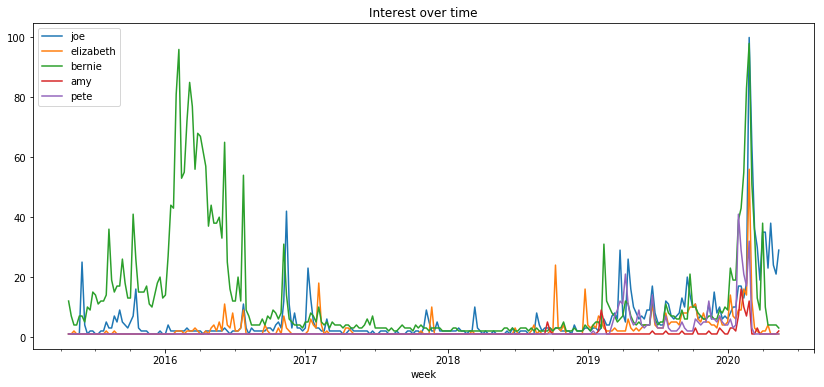

In [7]:
# use the .plot() method on the dataframe to plot the data
candidates.plot(figsize=(14,6))

#add google's trend graph title. ';' is utilized to remove the matplot lib description
plt.title('Interest over time');

We see Bernie dominating the results from Feb 2016 until about the end of May. This was during Saners' 2016 run for president. 
The small spike in June may be due to the June 7th primaries which included California. And the headlines that Bernie was not planning to concede leading up to the Democratic National Convention.


Lets zoom in starting at the time right before the democratic primary debates and overlay the democratic primary debates.

In [8]:
# The democracitc debates were:'June 26, 2019','July 30, 2019','September 12, 2019','October 15, 2019',
# 'November 20, 2019', December 19, 2019','January 14, 2020', 'February 7, 2020','February 19, 2020','March 15, 2020'
# but this data is weekly - we'll need to adjust the dates to the date that represents the week the debate took place.

# place the adjusted dates into a list
debate_dates = ['June 23, 2019','July 28, 2019','September 8, 2019','October 13, 2019','November 17, 2019',
                'December 15, 2019','January 12, 2020', 'February 2, 2020','February 16, 2020','March 15, 2020']

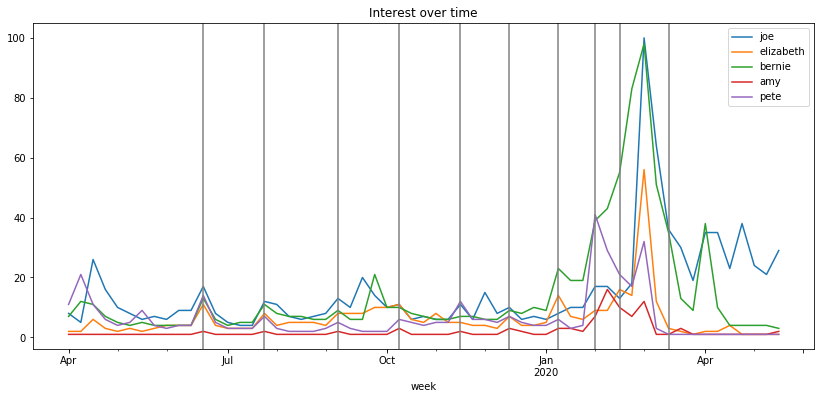

In [9]:
# plot the data subsetting from April 2019 to the end of the dataset
candidates.loc['April 2019':].plot(figsize=(14,6))

# for each date in debate_dates, plot a vertical line
for x in debate_dates:
    plt.axvline(x, color='grey')

plt.title('Interest over time');

We can see how there are spikes on/around the debate dates. There are a couple of spikes well before the first debate.
We see a small spike in April for Pete Buttigieg. On **April 15** Buttigieg announced his campaign. There is a smaller spike on **April 22** for Elizabeth Warren that corresponds to the release of her plan to cancel student debt and eliminate college tuition. Joe Biden announced his presidential campaign on **April 25th**. 



Here is a rough timeline of events that may have driven some of the resulting spikes.<br><br>
Events taken from:<br>
*http://ballotpedia.org*<br>
*https://en.wikipedia.org/wiki/Timeline_of_the_2020_United_States_presidential_election* <br>
*Google Archive Search*<br><br>
**Sept 1-7**
- **Pete** <br>
    - **September 5, 2019:** Buttigieg spoke about Afghanistan, his Episcopalian faith, and climate change on The Late Show with Stephen Colbert night. Buttigieg also made his first television ad buy of the campaign, spending \\$87,000 in Iowa markets.<br>
    - **September 4, 2019:** Buttigieg proposed three pillars in his \\$1.1 trillion climate change proposal morning: building a clean economy, investing in disaster relief and prevention, and promoting America’s international role in combating climate change.<br>

- **Bernie:** <br>
    - **September 4, 2019:** In an appearance on The View, Sanders discussed the difference between his 2016 and 2020 presidential campaigns.

- **Amy:** <br>
    - **September 6, 2019:** Klobuchar spoke about the economy at Manchester Community College as part of a presidential forum series.<br>
    - **September 1, 2019:** Klobuchar released a climate plan that included the goals of 100% net zero emissions by 2050, participating in the Paris Climate Agreement, and restoring the Clean Power Plan.<br>

- **Joe:** <br>
    - **September 4-5, 2019:** Biden appeared on The Late Show with Stephen Colbert on September 4 and remained in New York for two fundraisers September 5.<br>
    - **September 2, 2019:** Biden said he "wasn't trying to mislead anybody" in response to a Washington Post piece that said the details of a story he told on the campaign trail about a Navy captain who refused a Silver Star medal were not accurate. Biden said, "[T]he story was that he refused the medal because the fella he tried to save — and risked his life saving — died. That’s the beginning, middle and end. The rest of you guys can take it and do what you want with it.”<br>

- **Elizabeth:** <br>
    - **September 4, 2019:** Warren announced that she was endorsing and adopting Jay Inslee’s climate plan and would commit an additional $1 trillion over 10 years to subsidize the transition to a clean energy economy. <br><br>

**September 8-14**
- **All:** <br>
    - **September 12, 2019:** Participated in the third Democratic primary debate in Houston. The candidates discussed Medicare for All, criminal justice, international trade agreements, gun violence, military strategy in Afghanistan, education, and climate change. To read debate highlights for Biden, click here. 

- **September 9, 2019:** Participated in a political ad on gun violence produced by an advocacy organization founded by former Rep. Gabrielle Giffords, Giffords' Courage to Fight Gun Violence. The ad was part of a six-figure digital buy. Also that day, McClatchy DC reported on Biden's campaign organization in Iowa, including a comparison to Elizabeth Warren's more hyperlocal style.<br>

- **Joe:**<br>
    - **September 12:** Biden tweeted a video highlighting Barack Obama’s presidency and the Affordable Care Act.<br>

**September 15-21** <br>
- **Warren** <br>
    - **September 17, 2019:** Warren appeared on The Late Show with Stephen Colbert.<br><br>

**September 22-28:** <br>
- **Joe:** <br>
    - **September 25, 2019:** In an interview on Jimmy Kimmel Live, Biden discussed the impeachment inquiry.<br>
    - **September 25, 2019:** Great America PAC started airing a six-figure ad calling for an investigation into Joe Biden’s role in the firing of a Ukranian prosecutor. It began airing on Fox News and online.<br>
    - **September 27, 2019:** Biden held a community event in Las Vegas.<br>
- **Bernie:**<br>
    - **September 24, 2019:** Sanders proposed a wealth tax that would progressively tax households on any net worth over $32 million. Eight wealth tax brackets would exist, ranging from 1 percent to 8 percent.<br>
- **Elizabeth:**<br>
    - **September 23, 2019:** Marie Claire interviewed Warren about reproductive issues, debt among millennials, and climate change.<br><br>

**September 29-5:**<br>
- **Bernie:**<br>
    - **October 2, 2019:** Bernie Sanders hospitalized for blocked artery<br>
- **Amy:**<br>
    - **October 2, 2019:** Klobuchar released her first television ad in Iowa and New Hampshire in a six-figure campaign.<br>

**October 13:**<br>
**Debate 'winners':** Elizabeth, Bernie, Amy, Pete <br>
- **Pete:**<br>
    - Debate - clash over medicare for all, O'Rourke<br>
    - **October 9, 2019:** In an interview with Pride Source, Buttigieg discussed his campaign, who he looks up to in the LGBTQ community, and where he and other candidates stand on LGBTQ issues.<br>
    - **October 15, 2019:** Buttigieg released a digital ad in Iowa critical of Medicare for All. It featured political analysts discussing the healthcare proposals of Sanders and Warren.<br>

- **Amy:** <br>
    - Third highest speaking time at debate, clash over medicare for all<br>

- **Elizabeth:** <br>
    - Considered front line runner<br>

**November 17-23** <br>
- **November 16, 2019:** Pete, Bernie, Amy participated in the Real América Presidential Forum hosted by the Democratic Party of California and Univision. The event took place as part of the state party's endorsing convention that weekend.<br>

- **Joe:** <br>
    - Allegations of corruption in Ukraine involving Burisma / Hunter Biden <br>

**December 1-7** <br>
- **Joe:** 
    - News reports of Biden playfully biting his wife's finger at a campaign rally
    - Viral video of Joe talking about his hairy legs<br>
    - News reports of a heated exchange with an Iowa voter during a town hall<br>

**December 15-19** <br>
    - **Elizabeth:** <br>
        - Challenges Buttigeig on big donors and the wine cave <br>

**January 12-18** <br>
- **Sanders / Warren:** 
    - **Debate:**Warren/Sanders tense post-debate exchnage<br>

**February 16-22**<br>
- **Sanders:**<br>
    - **February 21** News Reports of Russia attempting to help his campaign<br>

**March**<br>
**March 1** Buttigieg drops out of the race<br>
**March 2** Klobuchar drops out of the race<br>
**March 3** Super Tuesday / Biden & Sanders come out on top<br>
**March 5** Warren Drops out of the race<br>
**March 27** Biden - townhall on coronavirus news reports of sexual assault allegations against Joe Biden<br>

**April 8:** Sanders drops out of race<br>

**May 1:** Biden denies sexual assault allegation<br>

## The more famous candidate?
Well who is actually the most famous candidate, well the most searched on Google at least? The original graph is a bit noisy. Lets smooth it out a bit.

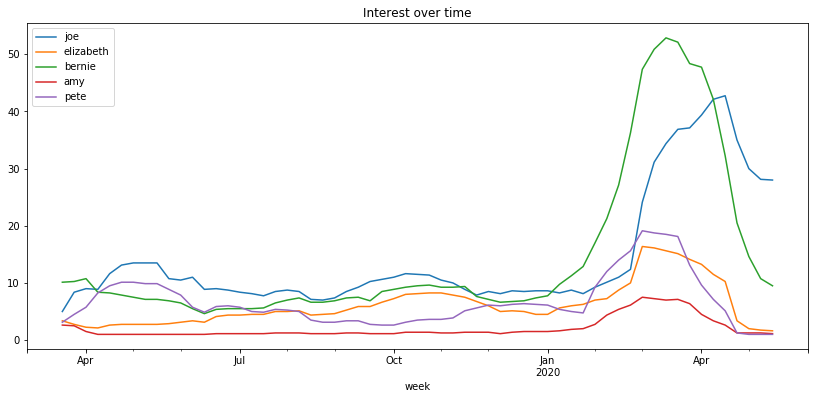

In [10]:
# we'll add the .rolling method with a window of 2 months (8 weeks). We'll take the mean and plot the results
candidates.loc['February 2019':].rolling(window=8).mean().plot(figsize=(14,6))
plt.title('Interest over time');

First I'd like to point out something interesting - Pete's large initial climb  in April/May of 2019, then his smaller climb at the end of the year where other candidates were starting to drop down or stay flat.

As for the most popular candidate, could it be Biden? It looks like Biden maintained somewhat of a lead through most of the debates. Though towards the end Bernie Sanders over took Biden in April presumably after Sanders left the race. Who do you think is the more popular candidate?

In [11]:
candidates.to_csv('candidates_cleaned.csv')